In [ ]:
#all import statments
import pandas as pd
import numpy as np
from ucimlrepo import fetch_ucirepo
import random

In [ ]:
# fetch dataset
diabetic_retinopathy_debrecen = fetch_ucirepo(id=329)

# data (as pandas dataframes)
x = diabetic_retinopathy_debrecen.data.features
y = diabetic_retinopathy_debrecen.data.targets

# variable information
url = 'https://archive.ics.uci.edu/static/public/329/data.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(url)
df.head()

# Data Exploration Task 1

**Dataset explaination**

-> The dataset appears to be related to the assessment of diabetic retinopathy (DR) using various features derived from retinal images. The target variable, 'Class,' is binary, with 1 indicating the presence of signs of DR and 0 indicating no signs of DR.

List of Features and Their Purposes:

**Binary Features**:

* **quality**: Result of quality assessment (0 = poor quality, 1 = adequate quality).
* **pre_screening**: The pre-screening result (0 = lack of abnormality, 1 = significant retinal abnormality).
* **am_fm_classification**: AM/FM-based binary classification result.

**MA Detection Features** :

* **ma1 to ma6**: Number of MAs discovered at varying confidence levels (alpha = 0.5 to 1).

**Exudate Features**:

* **exudate1 to exudate8** :  Data on exudates, normalized by dividing the total number of lesions by the diameter of the ROI (Region of interest).

**Distance and Size Features**:

* **macula_opticdisc_distance**: The Euclidean distance, normalized with the diameter of the ROI, between the macula and the optic disc centers.

* **opticdisc_diameter**: The optic disc's diameter.

**Goal Variable**:

* **Class**: Class label (1 indicates DR is present, 0 indicates DR is absent).

# Data Exploration Task 2

In [ ]:
missing_values = df.isnull().sum()
print(f"The number of missing values in the dataset are\n{missing_values}")

There are no missing values in any of the features.

# Data Exploration Task 3

In [ ]:
# Choosing the relevant feature for analysis
feature_name = 'macula_opticdisc_distance'
relevant_feature = df[feature_name]

# Calculating individual statistics
minimum_value = relevant_feature.min()
maximum_value = relevant_feature.max()
mean_value = relevant_feature.mean()
median_value = relevant_feature.median()
mode_value = relevant_feature.mode().values[0]  # Mode may have multiple values, so we take the first one
range_value = maximum_value - minimum_value
variance_value = relevant_feature.var()
std_deviation_value = relevant_feature.std()
quartiles = relevant_feature.quantile([0.25, 0.5, 0.75])

# Printing the results
print(f"Statistics for {feature_name}:\n")
print(f"Minimum: {minimum_value}")
print(f"Maximum: {maximum_value}")
print(f"Mean: {mean_value}")
print(f"Median: {median_value}")
print(f"Mode: {mode_value}")
print(f"Range: {range_value}")
print(f"Variance: {variance_value}")
print(f"Standard Deviation: {std_deviation_value}")
print("\nQuartiles:")
print(quartiles)


# Data Exploration Task 4

In [ ]:
# Defining the number of bins and create bins for the feature
num_bins = 10
bins = pd.cut(df['macula_opticdisc_distance'], num_bins)

# Calculating the frequency distribution
frequency_distribution = bins.value_counts()

# Printing the frequency distribution
print("Frequency Distribution for 'macula_opticdisc_distance':")
print(frequency_distribution)

# Data Exploration Task 5

In [ ]:
# Accessing the bin edges and calculating the mean of each bin
bin_edges = frequency_distribution.index.categories
mean_frequency_distribution = (bin_edges.left + bin_edges.right) / 2

# Calculating the mean of the frequency distribution
weighted_mean = (mean_frequency_distribution * frequency_distribution).sum() / frequency_distribution.sum()

print("Mean of the Frequency Distribution:", weighted_mean)

# Data Shaping Task 1

In [ ]:
np.random.seed(42)
num_instances = 2000

# Creating a DataFrame to store the synthetic data
synthetic_data = pd.DataFrame()
for column in df.columns:
    synthetic_data[column] = np.random.normal(loc=df[column].mean(), scale=df[column].std(), size=num_instances)
for column in df.columns:
    min_val = df[column].min()
    max_val = df[column].max()
    synthetic_data[column] = np.clip(synthetic_data[column], min_val, max_val)

print("Synthetic Data:", )
print(synthetic_data.head())
synthetic_data.to_csv('synthetic_data.csv', index=False)

# Data Shaping Task 2

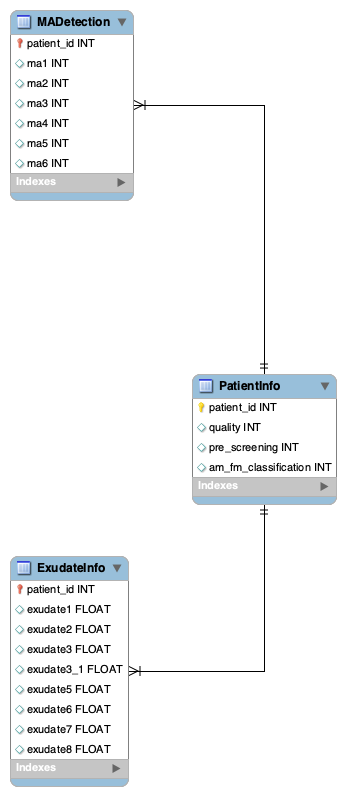

1. **PatientInfo Table**:

Attributes: patient_id (Primary Key), quality, pre_screening, am_fm_classification

*Constraints*:
patient_id is the primary key, ensuring each patient has a unique identifier.

*Relationships*:
One-to-Many relationship with both MADetection and Exudate tables, meaning one patient can have multiple MA detections and multiple exudate records.

2. **MADetection Table**:

*Attributes*: 
ma_id (Primary Key), ma1, ma2, ma3, ma4, ma5, ma6, patient_id (Foreign Key)

*Constraints*:
ma_id is the primary key, ensuring each MA detection record has a unique identifier.
patient_id is a foreign key referencing the patient_id in the PatientInfo table, establishing a Many-to-One relationship.

*Relationships*:
Many-to-One relationship with the PatientInfo table, indicating that multiple MA detections can be associated with a single patient.

3. **Exudate Table**:

*Attributes*: exudate_id (Primary Key), exudate1, exudate2, exudate3, exudate3_1, exudate5, exudate6, exudate7, exudate8, patient_id (Foreign Key)

*Constraints*:
exudate_id is the primary key, ensuring each exudate record has a unique identifier.
patient_id is a foreign key referencing the patient_id in the PatientInfo table, establishing a Many-to-One relationship.

*Relationships*:
Many-to-One relationship with the PatientInfo table, indicating that multiple exudate records can be associated with a single patient.

**Grouping and Reasoning**:

* The tables are grouped based on related entities and their attributes.

* PatientInfo serves as the central table containing general patient information.

* MADetection and Exudate tables are linked to PatientInfo to represent the relationships between patients and their corresponding MA detections and exudate records.

* The design supports the idea that a patient can have multiple MA detections and exudate records, allowing for a flexible representation of the dataset structure.

This grouping and relational structure allow for efficient data retrieval and analysis while maintaining data integrity through the use of primary and foreign keys. It reflects the inherent relationships between the entities in the context of diabetic retinopathy assessment.

# Data Sampling Task 1

In [ ]:
def get_sample_from_dataframe(df, sample_size, criteria_func=None):
    """
    Get a random sample from a DataFrame based on specified criteria.

    Parameters:
    - df: The input DataFrame.
    - sample_size: The number of records to include in the sample.
    - criteria_func: A function that takes a DataFrame row as input and returns a boolean
                    indicating whether the record meets the criteria. If None, default criteria
                    based on quality, pre-screening, and classification will be applied.

    Returns:
    - A DataFrame containing the sampled records.
    """
    if criteria_func is None:
        criteria_func = lambda x: x['quality'] == 1 and x['pre_screening'] == 1 and x['am_fm_classification'] == 1

    # Applying the criteria function to filter DataFrame rows
    filtered_df = df[df.apply(criteria_func, axis=1)]

    # Checking if sample size is greater than the number of filtered records
    sample_size = min(sample_size, len(filtered_df))
    sample_df = filtered_df.sample(n=sample_size)

    return sample_df


# Getting a sample based on default criteria
sample_result_default = get_sample_from_dataframe(df, sample_size=5)
print("Sampled Data (Default Criteria):")
print(sample_result_default)

# Defining a custom criteria function
custom_criteria_function = lambda x: x['ma1'] > 2
sample_result_custom = get_sample_from_dataframe(df, sample_size=5, criteria_func=custom_criteria_function)
print("\nSampled Data (Custom Criteria):")
print(sample_result_custom)


# Data Sampling Task 2/3 Sample 1 Creation and Descriptive Statistics

In [ ]:
# Sample 1: Low Macula-Optic Disc Distance
sample_low_distance = df[df['macula_opticdisc_distance'] < df['macula_opticdisc_distance'].quantile(0.25)].copy()
sample_low_distance.to_csv('sample_low_distance.csv', index=False)
print("first 5 rows of Sample_low_Distance:")
print(sample_low_distance.head())

#printing the descriptive statistics of sample 1
print("\nDescriptive Statistics for Sample 1 (sample_low_distance):\n")
print(sample_low_distance.describe())

# Data Sampling Task 2/3 Sample 2 Creation and Descriptive Statistics

In [ ]:
# Sample 2: Medium-Low Macula-Optic Disc Distance
sample_medium_low_distance = df[(df['macula_opticdisc_distance'] >= df['macula_opticdisc_distance'].quantile(0.25)) &
                                (df['macula_opticdisc_distance'] < df['macula_opticdisc_distance'].quantile(0.5))].copy()
sample_medium_low_distance.to_csv('sample_medium_low_distance.csv', index=False)
print("first 5 rows of sample_medium_low_distance:")
print(sample_medium_low_distance.head())

#printing the descriptive statistics of sample 2
print("\nDescriptive Statistics for Sample 2 (sample_medium_low_distance):\n")
print(sample_medium_low_distance.describe())

# Data Sampling Task 2/3 Sample 3 Creation and Descriptive Statistics

In [ ]:
# Sample 3: Medium-High Macula-Optic Disc Distance
sample_medium_high_distance = df[(df['macula_opticdisc_distance'] >= df['macula_opticdisc_distance'].quantile(0.5)) &
                                 (df['macula_opticdisc_distance'] < df['macula_opticdisc_distance'].quantile(0.75))].copy()
sample_medium_high_distance.to_csv('sample_medium_high_distance.csv', index=False)
print("first 5 rows of sample_medium_high_distance:")
print(sample_medium_high_distance.head())

#printing the descriptive statistics of sample 3
print("\nDescriptive Statistics for Sample 3 (sample_medium_high_distance):\n")
print(sample_medium_high_distance.describe())

# Data Sampling Task 2/3 Sample 4 Creation and Descriptive Statistics

In [ ]:
# Sample 4: High Macula-Optic Disc Distance
sample_high_distance = df[df['macula_opticdisc_distance'] >= df['macula_opticdisc_distance'].quantile(0.75)].copy()
sample_high_distance.to_csv('sample_high_distance.csv', index=False)
print("first 5 rows of sample_high_distance:")
print(sample_high_distance.head())

#printing the descriptive statistics of sample 4
print("\nDescriptive Statistics for Sample 4 (sample_high_distance):\n")
print(sample_high_distance.describe())